# member_account_info (MAI): Raw Data Discovery & Insights

### Target Attributes: Member_Id, Gender, Birthday

In [ ]:
import sqlite3
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns


conn = sqlite3.connect(r"__PATH__")

df = pd.read_sql_query("SELECT * FROM member_account_info", conn)

### Data Understanding, Cleaning & Preparation

In [2]:
df.shape

(1000, 15)

In [3]:
df.head(2)

,member_row_id,member_id,First Name,Last Name,Gender,Address,Zip Code,Membership,Referral,Emergency Contact,Birthday,Nationality,Join Date,Email,Phone
0,1,ABC1000,ANGELA,Brewer,Male,"80569 Cameron Locks Apt. 013, Garciaton, RI",04153,Annual,No,Andrea Lester,2004-02-10,Sierra Leone,2024-08-21,angela.brewer@example.com,NAN
1,2,ABC1001,Jared,Sanchez,Female,"28519 Hubbard Mills, Port Jessica, NC",59045,M2M,Yes,Rebecca Ross,1985-06-10,Barbados,2024-01-04,jared.sanchez@example.com,None


In [4]:
df.columns

Index(['member_row_id', 'member_id', 'First Name', 'Last Name', 'Gender',
       'Address', 'Zip Code', 'Membership', 'Referral', 'Emergency Contact',
       'Birthday', 'Nationality', 'Join Date', 'Email', 'Phone'],
      dtype='object')

In [5]:
df.dtypes

member_row_id         int64
member_id            object
First Name           object
Last Name            object
Gender               object
Address              object
Zip Code             object
Membership           object
Referral             object
Emergency Contact    object
Birthday             object
Nationality          object
Join Date            object
Email                object
Phone                object
dtype: object

In [6]:
df = df[[#'index', 'member_row_id', 
         'member_id', 
         #'First_Name', 'Last_Name',
       'Gender', 
       #'Address', 'Zip_Code', 'Membership', 'Referral',
       #'Emergency Contact', 
       'Birthday', 
       #'Nationality', 'Join_Date', 'Email',
       #'Phone', 'Account_Status'
       ]].copy()

In [7]:
df.head(), df.dtypes

(  member_id   Gender     Birthday
 0   ABC1000     Male   2004-02-10
 1   ABC1001  Female    1985-06-10
 2   ABC1002     Male   1999-11-13
 3   ABC1003     Male   1993-05-19
 4   ABC1004     MALE  1988-11-27 ,
 member_id    object
 Gender       object
 Birthday     object
 dtype: object)

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.isna().sum()

member_id     0
gender       56
birthday     53
dtype: int64

In [10]:
df[df['gender'].isna()].head(10)

,member_id,gender,birthday
16,ABC1016,None,1997-03-24
70,ABC1070,None,None
109,ABC1109,None,1993-11-24
121,ABC1121,None,1989-06-24
141,ABC1141,None,1989-06-30
145,ABC1145,None,1991-06-12
163,ABC1163,None,1981-06-07
173,ABC1173,None,1996-06-07
199,ABC1199,None,1986-12-29
203,ABC1203,None,1995-05-12


In [11]:
df['gender'].value_counts()

gender
Male       436
Female     292
Male        81
Female      53
MALE        33
FEMALE      23
nan         11
NAN          6
FEMALE       5
MALE         4
Name: count, dtype: int64

In [12]:
df['gender'] = df['gender'].str.strip().str.lower()
df['gender'].value_counts()

gender
male      554
female    373
nan        17
Name: count, dtype: int64

In [13]:
df['gender'] = df['gender'].replace('nan', np.nan)
df['gender'].value_counts()

gender
male      554
female    373
Name: count, dtype: int64

In [14]:
df['birthday'] = pd.to_datetime(df['birthday'], errors='coerce')

In [15]:
today = pd.to_datetime("today")
df['age'] = (today - df['birthday']).dt.days // 365

In [16]:
df.loc[df.duplicated(['member_id'])]

,member_id,gender,birthday,age


In [17]:
df.head(10)

,member_id,gender,birthday,age
0,ABC1000,male,2004-02-10,21.0
1,ABC1001,female,1985-06-10,40.0
2,ABC1002,male,1999-11-13,25.0
3,ABC1003,male,1993-05-19,32.0
4,ABC1004,male,NaT,NaN
5,ABC1005,male,1982-01-22,43.0
6,ABC1006,male,1987-11-19,37.0
7,ABC1007,female,1980-03-27,45.0
8,ABC1008,male,1988-09-26,36.0
9,ABC1009,female,1987-10-22,37.0


In [18]:
df.shape

(1000, 4)

### Load to clean_db

In [ ]:
con_out = sqlite3.connect(r"__PATH__")
df.to_sql("member_account_info", con_out, if_exists="replace", index=False)
con_out.close()

### Exploration

In [20]:
df.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,294.0,36.459184,10.073622,19.0,29.0,35.0,44.0,67.0
male,424.0,35.379717,9.479337,18.0,28.0,35.0,41.0,69.0


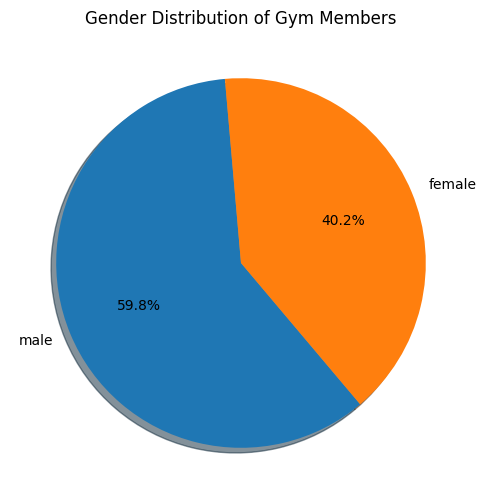

In [21]:
plt.figure(figsize=(6,6))
df['gender'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=95, 
    shadow=True
)
plt.title('Gender Distribution of Gym Members')
plt.ylabel('')
plt.show()

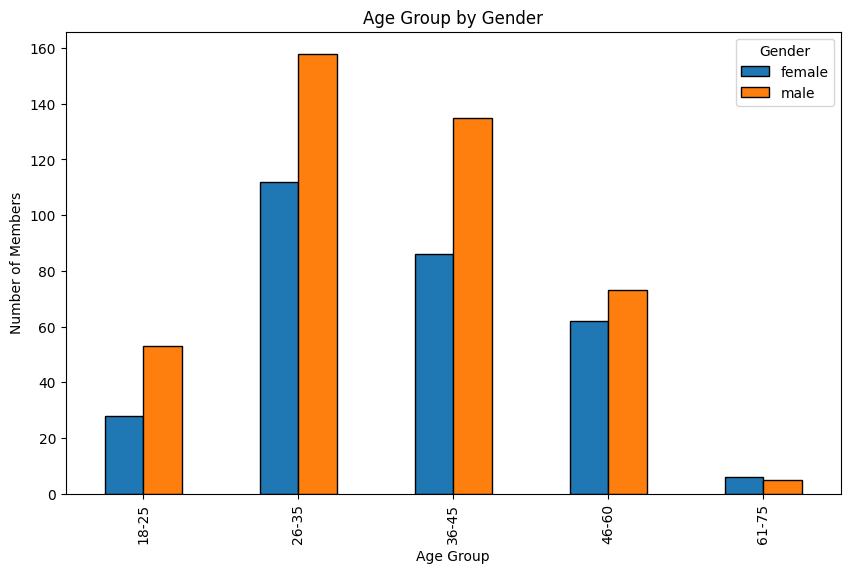

In [22]:
# Create age groups
bins = [0, 18, 25, 35, 45, 60, 75, 100]
labels = ['0-18', '18-25', '26-35', '36-45', '46-60', '61-75', '76+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Crosstab
age_gender_ct = pd.crosstab(df['age_group'], df['gender'])

# Bar plot
age_gender_ct.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.title('Age Group by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Members')
plt.legend(title='Gender')
plt.show()